## EE 242 Lab 2 - Signal Convolution

Sabrina Hwang, Bryan Vo, Ting Jones

In [1]:
# We'll refer to this as the "import cell." Every module you import should be imported here.
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import simpleaudio as sa
from scipy import ndimage
from skimage import color
import matplotlib.image as mpimg
# import whatever other modules you use in this lab -- there are more that you need than we've included 

## Summary

This lab presents a series of exercises involving convolution of time signals and images.

## Section 1: Simple Convolutions

<IPython.core.display.Javascript object>


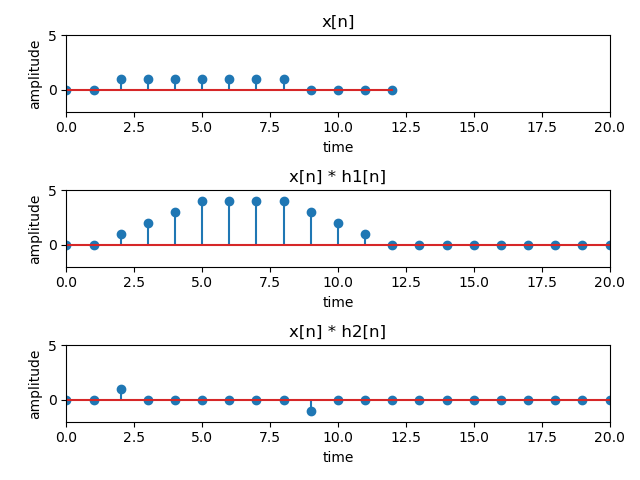

In [2]:
# Part 1 - Time Scaling Function

# Part A

# Create three discrete-time signals, assuming a time range of [0,12]
# x: input signal vector, a box of height 1 starting at time n=2 and ending at n=8
# h1: a pulse of length 4 & height 1 starting at time 0
# h2 = 1 at n=0, -1 at n=1, and 0 otherwise
x = np.concatenate([np.zeros(2), np.ones(7), np.zeros(4)])
h1 = np.concatenate([np.ones(4), np.zeros(9)])
h2 = np.concatenate([np.ones(1), -1 * np.ones(1), np.zeros(11)])

# Part B
# Find the responses y1=x*h1 and y2=x*h2
y1 = np.convolve(x, h1)
y2 = np.convolve(x, h2)

# Part C
# Plot x, y1 and y2 in a 3x1 plot
# time vectors for x, and the convolutions ny1, ny2
nx = np.arange(len(x))
ny1 = np.arange(len(y1))
ny2 = np.arange(len(y2))

plt.figure(1)
# plot x
plt.subplot(311)
plt.stem(nx, x)
plt.title('x[n]')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0, 20)
plt.ylim(-2, 5)

# plot x[n] * h1[n]
plt.subplot(312)
plt.stem(ny1, y1)
plt.title('x[n] * h1[n]')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0, 20)
plt.ylim(-2, 5)

# plot x[n] * h2[n]
plt.subplot(313)
plt.stem(ny2, y2)
plt.title('x[n] * h2[n]')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.xlim(0, 20)
plt.ylim(-2, 5)

plt.tight_layout()

###  Discussion

Comment on what aspects of the input signal correspond to the largest values of y1[n] and y2[n] 

The largest value of y1[n] is 4, which would be the area of the largest overlap between both of the input signals.
The largest value of y2[n] is 1 or -1, which correlates to the largest values in h2.

## Section 2: Smoothing Signals

<IPython.core.display.Javascript object>


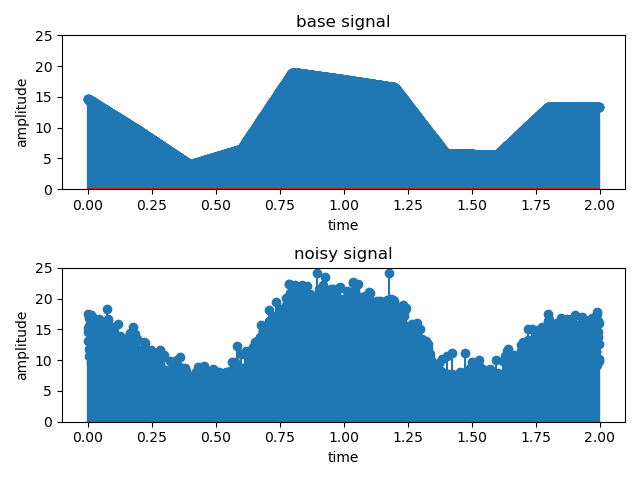

<IPython.core.display.Javascript object>


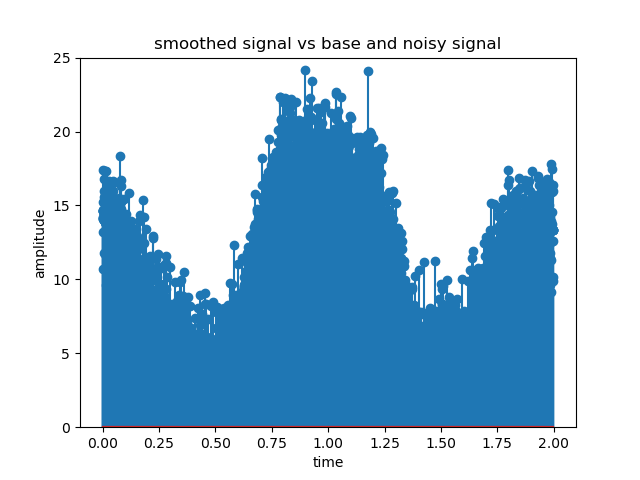

<IPython.core.display.Javascript object>


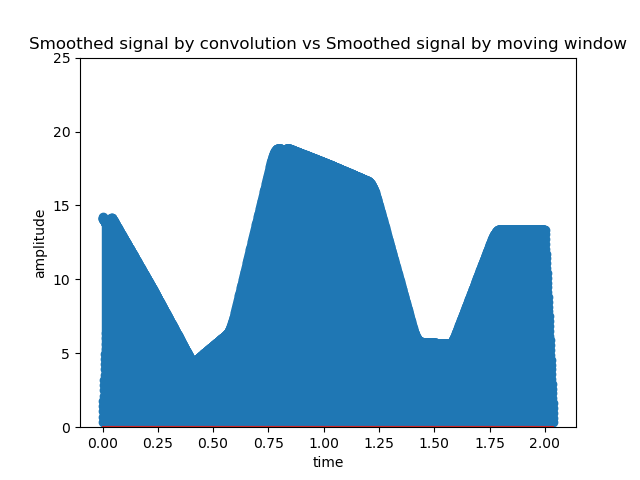

(0.0, 25.0)

In [3]:
# Assignment 2 - Amplitude Operations on Signals

# Part A
# set up relevant parameters
srate = 1000 # sampling rate in Hz
time  = np.arange(0,2,1/srate) # associated time vector that corresponds to 2 seconds
n     = len(time) # length of the time vector

# here is a base signal to work with, values of signal points chosen randomly
p     = 10 # points for piecewise linear signal
amp = 20   # amplitude range of base signal
base = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*amp)

# create some random noise to be added to the above base signals
noiseamp = 2
noise  = noiseamp * np.random.randn(n)

# add noise to the base signals to create new noisy signals
noisySignal = np.add(base, noise)
time = np.arange(len(base)) / 1000

# graph the base signal compared to the noisy signal
plt.figure(2)
plt.subplot(211)
plt.stem(time, base)
plt.title('base signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

plt.subplot(212)
plt.stem(time, noisySignal)
plt.title('noisy signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

plt.tight_layout()

# Part B
# implement the running mean filter with a for loop
# construct a moving window of width 40, which will smooth out the signal by taking the average over this window
k = 20 * 2
filtsig1 = []
for i in range(len(base)):
    window_arr = base[i: k + i]
    if (len(window_arr) == k):
        average = np.mean(base[i: k + i])
        filtsig1 = np.append(filtsig1, average)
# create a time array corresponding to the length of the smoothed signal, sampling frequency is 1000Hz
timeFilter1 = np.arange(len(filtsig1)) / 1000

# plot the smooth signal on top of the noisy signal
plt.figure(3)
plt.stem(time, base)
plt.stem(time, noisySignal)
plt.stem(timeFilter1, filtsig1)
plt.title('smoothed signal vs base and noisy signal')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

# Part C
# implement smoothing using convolution
k = 20
n = 2 * k + 1
hfilt = (1 / n) * np.ones(n) 
filtsig2 = np.convolve(hfilt, base)
# create a time array corresponding to the length of the smoothed signal, sampling frequency is 1000Hz
timeFilter2 = np.arange(len(filtsig2)) / 1000

# plot the smoothed signals from convolution and from the moving window on top of each other
plt.figure(4)
plt.stem(timeFilter1, filtsig1)
plt.stem(timeFilter2, filtsig2)
plt.title('Smoothed signal by convolution vs Smoothed signal by moving window')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.ylim(0, 25)

###  Discussion

For the smoothing window, there's a hard limit on the window, losing samples on the edges, which decreases the overall length of the array. In the convolve function, the edge cases are still calculated, therefore the length is greater and extends past the smoothing window.
For larger values of k, the output is smoother, due to more samples being included in the average. For smaller values of k, the output is more jagged, due to less samples being included in the average.

## Section 3: Removing Noise from an Audio Signal 

In [4]:
# Part A
# read in trombone11 audio file and generate random noise
f1, tr_orig = wav.read('trombone11.wav')
noise = 100 * np.random.randn(len(tr_orig))

# add the noise to the audio and write to file
tr_noisy = np.add(tr_orig, noise)
wav.write('tromboneNoisy.wav', f1, tr_noisy.astype('int16'))

# Part B
# filter the noisy signal by convolving the noisy signal with the previous filter constructed in Assignment 2,
# and write the result to an audio file
tr_filt = np.convolve(tr_noisy, hfilt)
wav.write('tromboneFiltered.wav', f1, tr_filt.astype('int16'))

# Part C
# load and play the original and filtered audio files one after the other
wav_obj_1 = sa.WaveObject.from_wave_file('trombone11.wav')
wav_obj_2 = sa.WaveObject.from_wave_file('tromboneFiltered.wav')
play_obj_1 = wav_obj_1.play()
play_obj_1.wait_done()
play_obj_2 = wav_obj_2.play()
play_obj_2.wait_done()

FileNotFoundError: [Errno 2] No such file or directory: 'trombone11.wav'

###  Discussion

Comment on the differences in how the original and noise-removed signals sound. Comment on the impact of large increases or decreases in the value of k. 

The noise-removed signal is much quieter than the original.
When scaling the noise-removed signal (to hear it at a larger volume), there was slight distortion (likely due to amplitudes being too large), but it was mostly the same.
For larger values of k, the output is smoother, due to more samples being included in the average. For smaller values of k, the output is more jagged, due to less samples being included in the average.

## Section 4: Convolution with Images

In [5]:
# Part A
# takes in an image and outputs the horizontal edges (y1), the vertical edges (y2),
# as well as the overall result of edge detection (yBoth) using Sobel edge detection
def edgyImage(image):
    # convolution kernels for the Sobel edge detector
    hFilter = np.array([[1, 0, -1], [2, 0, -2], [1, 0 , -1]])
    vFilter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    
    # finding and returning the horizontal (y1), vertical(y2), and overall edges by convolution (yBoth)
    y1 = ndimage.convolve(image, hFilter)
    y2 = ndimage.convolve(image, vFilter)
    yBoth = np.sqrt((np.power(y1, 2) + np.power(y2,2)))
    return y1, y2, yBoth

<IPython.core.display.Javascript object>


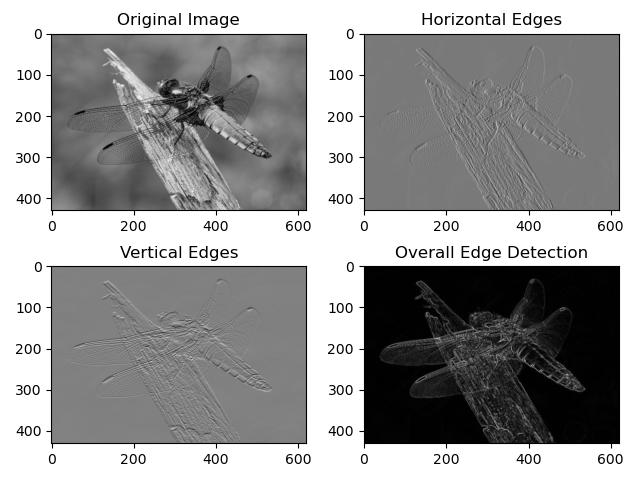

<IPython.core.display.Javascript object>


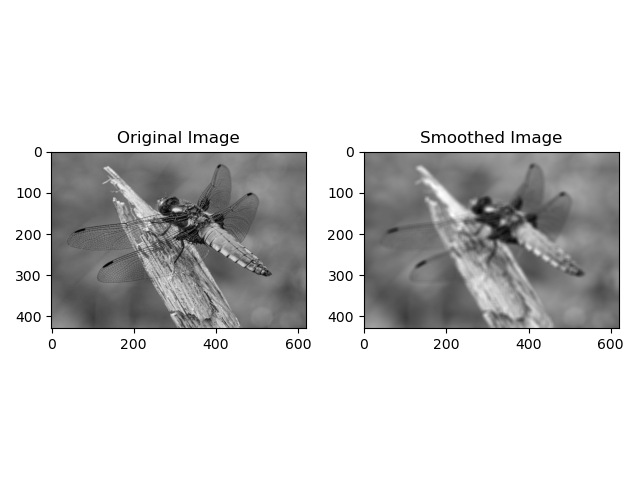

<IPython.core.display.Javascript object>


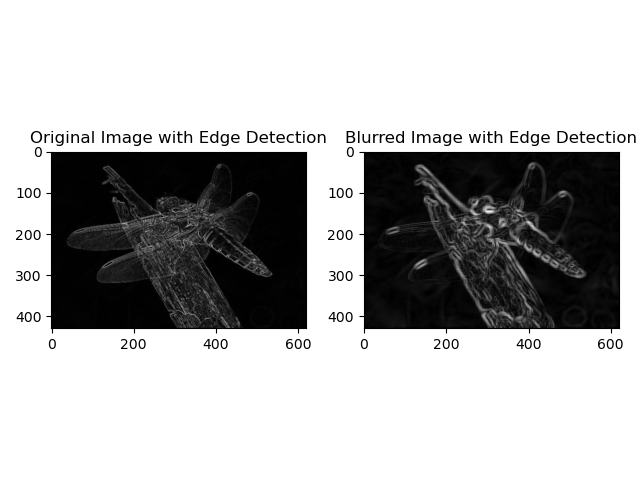

In [8]:
# Part B
# read in the image and convert to gray
image = color.rgb2gray(plt.imread('dragonfly.jpg'))
# find the edges and save horizontal edges, vertical edges, and the overall result
y1, y2, yBoth = edgyImage(image)

# plot the original image and the edge detection results in a 2x2 figure
plt.figure(5)
plt.subplot(221)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(222)
plt.imshow(y1, cmap = 'gray')
plt.title('Horizontal Edges')
plt.subplot(223)
plt.imshow(y2, cmap = 'gray')
plt.title('Vertical Edges')
plt.subplot(224)
plt.imshow(yBoth, cmap = 'gray')
plt.title('Overall Edge Detection')
plt.tight_layout()

# Part C
# create smoothing window and apply to the image
kernel = .05 * np.ones([10,10])
smoothed = ndimage.convolve(image, kernel)

# plot the original image and the smoothed result side-by-side
plt.figure(6)
plt.subplot(121)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(smoothed, cmap = 'gray')
plt.title('Smoothed Image')
plt.tight_layout()

# Part D
# find edges in the smoothed image and save the result
y3, y4, smoothedEdges = edgyImage(smoothed)

# plot the original edge detection image and the smoothed edge detection image side-by-side
plt.figure(7)
plt.subplot(121)
plt.imshow(yBoth, cmap = 'gray')
plt.title('Original Image with Edge Detection')
plt.subplot(122)
plt.imshow(smoothedEdges, cmap = 'gray')
plt.title('Blurred Image with Edge Detection')
plt.tight_layout()

### Discussion
Edge detection on the original image is much sharper and has a lot more detail, with very fine lines. Edge detection on the smoothed image is blurry and the lines are thicker, some details are lost.
A larger size smoothing filter makes the resulting edge detection image very distorted and the original image is hard to tell.